In [26]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/24/41/e53837badf8c85bf07ca1ea735cdd78df0f5bfe59e3affaaa174a55522c4/frozendict-2.3.9-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.9 MB 435.7 kB/s eta 0:00:07
     ---------------------------------------- 0.0/2.9 MB 435.7 kB/s eta 0:00:07
     ---------------------------------------- 0.0/2.9 MB 435.7 kB/s eta 0:00:07
      --------------------------------------- 0.0/2.9 MB 151.3 kB/s eta 0:00:20
      --------------------------------------- 0.1/2.9 MB 218.8 kB/s eta 0:00:14
     - ---------------------------------

[*********************100%%**********************]  1 of 1 completed
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2019-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1008 non-null   float64
 1   High       1008 non-null   float64
 2   Low        1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Adj Close  1008 non-null   float64
 5   Volume     1008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1 KB
None

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  1008.000000  1008.000000  1008.000000  1008.000000  1008.000000   
mean    110.665816   112.034063   109.353214   110.749856   109.030964   
std      43.242655    43.771753    42.664392    43.223091    43.227054   
min      35.994999    36.430000    35.500000    35.547501    34.118877   
25%      66.600000 

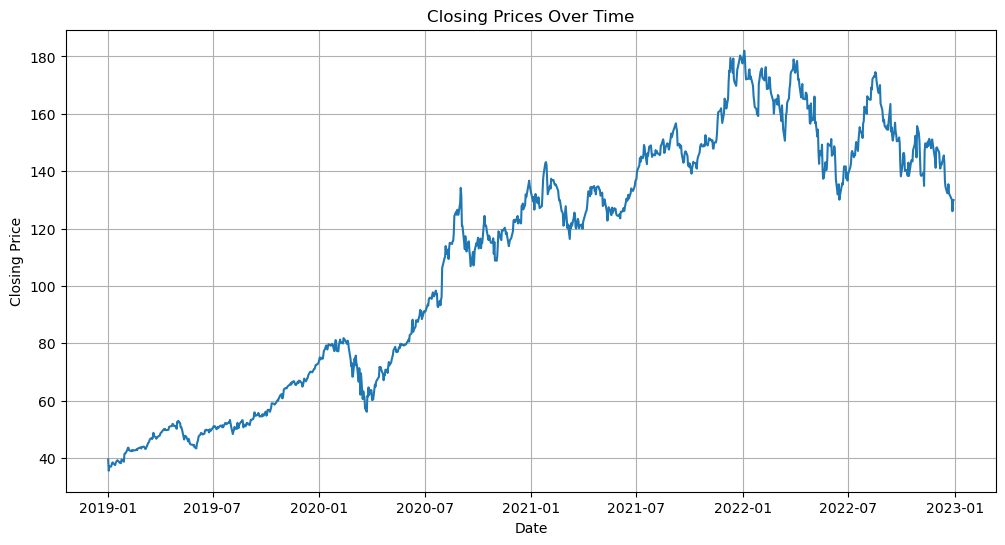

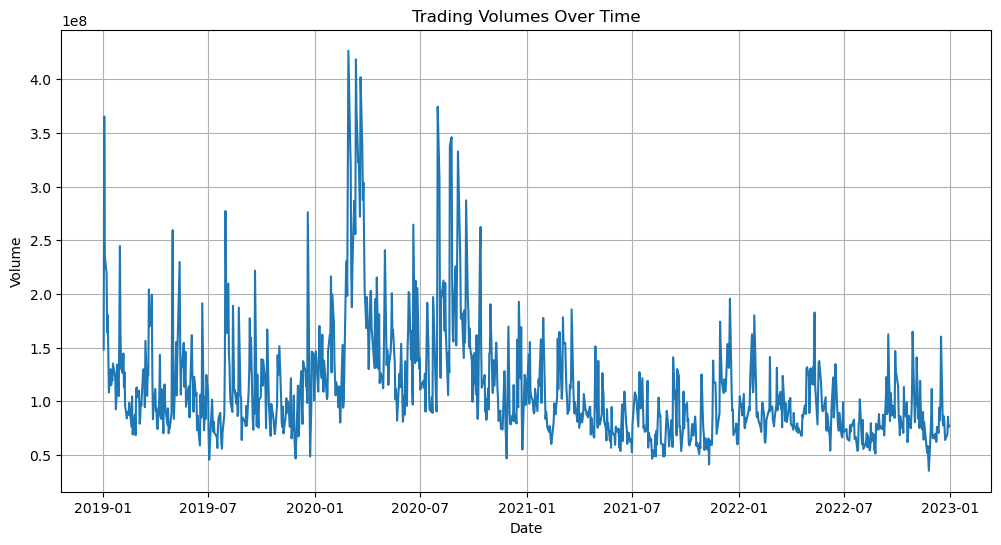

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch historical stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function for basic exploratory data analysis
def perform_eda(stock_data):
    # Display basic information about the dataset
    print("Dataset Information:")
    print(stock_data.info())

    # Display summary statistics
    print("\nSummary Statistics:")
    print(stock_data.describe())

    # Plot closing prices over time
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'])
    plt.title('Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

    # Plot trading volumes over time
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Volume'])
    plt.title('Trading Volumes Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.show()

# Specify the stock ticker, start date, and end date
ticker_symbol = 'AAPL'
start_date = '2019-01-01'
end_date = '2023-01-01'

# Fetch historical stock data
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

# Perform exploratory data analysis
perform_eda(stock_data)


In [32]:
import yfinance as yf
import pandas as pd

# Function to fetch historical stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to engineer features for machine learning
def engineer_features(stock_data):
    stock_data['Close_Lag1'] = stock_data['Close'].shift(1)
    stock_data['Close_Lag2'] = stock_data['Close'].shift(2)
    stock_data.dropna(inplace=True)
    return stock_data

# Specify the stock ticker, start date, and end date
ticker_symbol = 'AAPL'
start_date = '2019-01-02'
end_date = '2022-12-30'

# Fetch historical stock data
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)

# Engineer features
stock_data = engineer_features(stock_data)


[*********************100%%**********************]  1 of 1 completed


In [33]:
from sklearn.model_selection import train_test_split

# Function to split data into training and testing sets
def split_data(stock_data, target_column='Close', test_size=0.2):
    X = stock_data.drop(target_column, axis=1)
    y = stock_data[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = split_data(stock_data)


In [34]:
from sklearn.ensemble import RandomForestRegressor

# Function to build and train the model
def build_and_train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Build and train the model
model = build_and_train_model(X_train, y_train)


In [36]:
import numpy as np

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [37]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Absolute Percentage Error: {mape}')
    print(f'Explained Variance Score: {explained_variance}')

# Evaluate the model
evaluate_model(model, X_test, y_test)


Mean Squared Error: 0.1486166744540577
R-squared: 0.999918274803462
Mean Absolute Error: 0.28761462785711317
Mean Absolute Percentage Error: 0.2809374257517533
Explained Variance Score: 0.9999182834066939


1. Actual vs. Predicted Prices: Scatter Plot


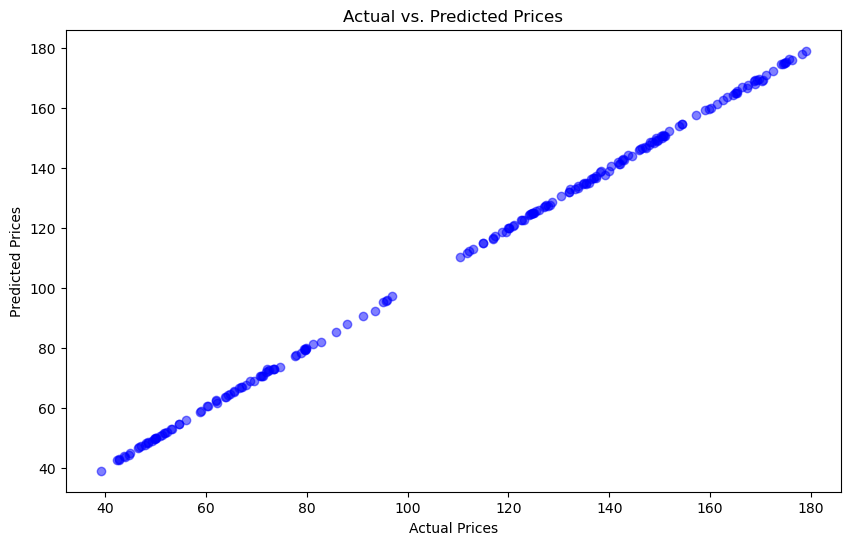

In [39]:
# Evaluate the model
y_pred = model.predict(X_test)

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


2. Residual Plot


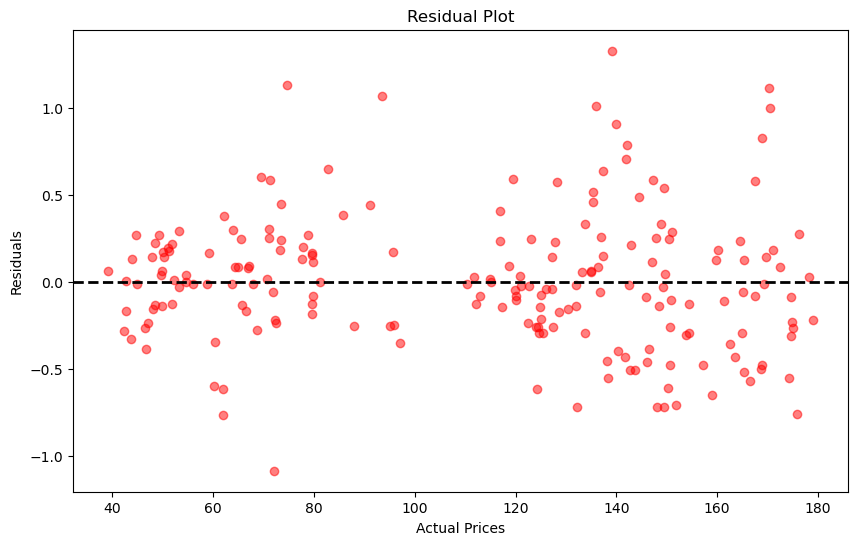

In [40]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='red', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()


3. Feature Importance Plot (for RandomForestRegressor)


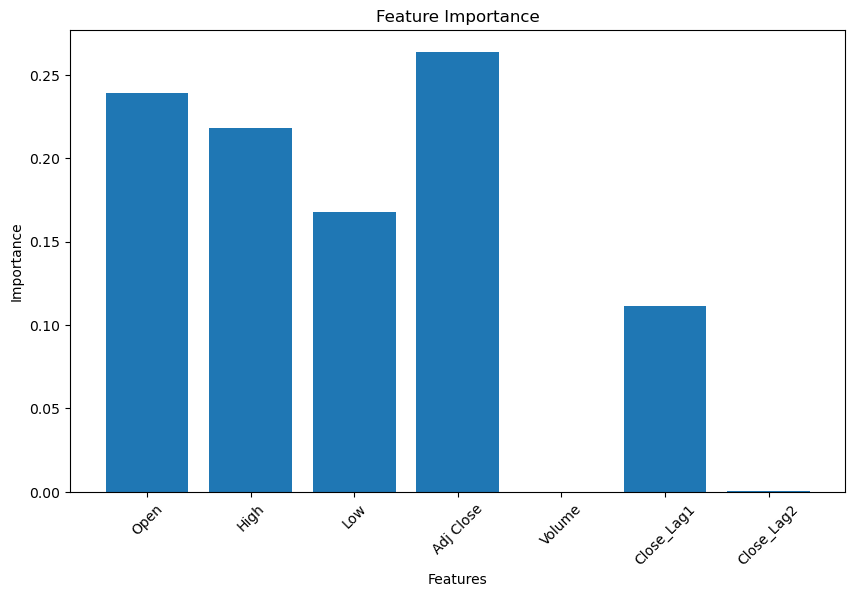

In [41]:
# Plotting feature importance (if using RandomForestRegressor)
feature_importance = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()
